# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?&units=metric&appid={weather_api_key}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Afaahiti
Processing Record 2 of Set 1 | Kyain Seikgyi Township
City not found. Skipping...
Processing Record 3 of Set 1 | Adamstown
Processing Record 4 of Set 1 | Edinburgh Of The Seven Seas
Processing Record 5 of Set 1 | Arkhangel'Sk
Processing Record 6 of Set 1 | Marica
Processing Record 7 of Set 1 | Waitangi
Processing Record 8 of Set 1 | Lerwick
Processing Record 9 of Set 1 | Hermanus
Processing Record 10 of Set 1 | Port-Aux-Francais
Processing Record 11 of Set 1 | Chonchi
Processing Record 12 of Set 1 | Kodiak
Processing Record 13 of Set 1 | Holualoa
Processing Record 14 of Set 1 | Villa Gesell
Processing Record 15 of Set 1 | Colonia
Processing Record 16 of Set 1 | Puerto Ayora
Processing Record 17 of Set 1 | Laguna De Perlas
Processing Record 18 of Set 1 | Ust-Nera
Processing Record 19 of Set 1 | Dudinka
Processing Record 20 of Set 1 | Lebu
Processing Record 21 of Set 1 | Ushuaia
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Afaahiti,-17.7500,-149.2833,21.93,75,94,7.61,PF,1691596855
1,Adamstown,-25.0660,-130.1015,20.12,67,60,10.66,PN,1691596955
2,Edinburgh Of The Seven Seas,-37.0676,-12.3116,11.06,67,40,9.44,SH,1691596501
3,Arkhangel'Sk,64.5401,40.5433,22.88,59,1,1.71,RU,1691596955
4,Marica,-22.9194,-42.8186,23.97,72,86,6.30,BR,1691596956


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Afaahiti,-17.7500,-149.2833,21.93,75,94,7.61,PF,1691596855
1,Adamstown,-25.0660,-130.1015,20.12,67,60,10.66,PN,1691596955
2,Edinburgh Of The Seven Seas,-37.0676,-12.3116,11.06,67,40,9.44,SH,1691596501
3,Arkhangel'Sk,64.5401,40.5433,22.88,59,1,1.71,RU,1691596955
4,Marica,-22.9194,-42.8186,23.97,72,86,6.30,BR,1691596956


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

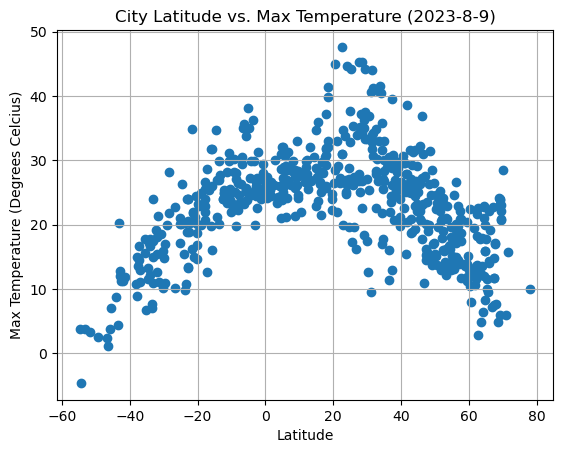

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(1)
latitude = city_data_df['Lat']
temp = city_data_df['Max Temp']
plt.scatter(x=latitude, y=temp)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Degrees Celcius)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (2023-8-9)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

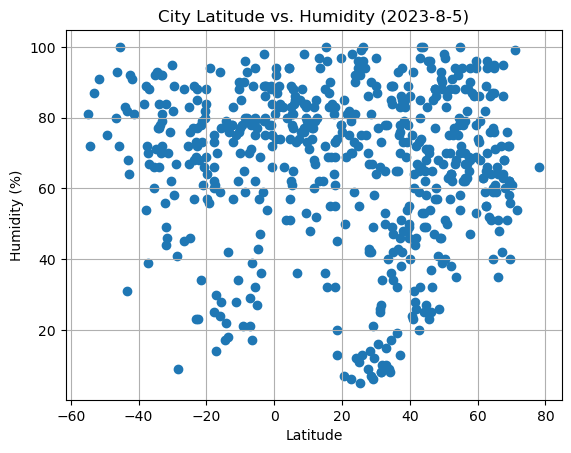

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(2)
plt.clf
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(x=latitude, y=humidity)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (2023-8-5)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

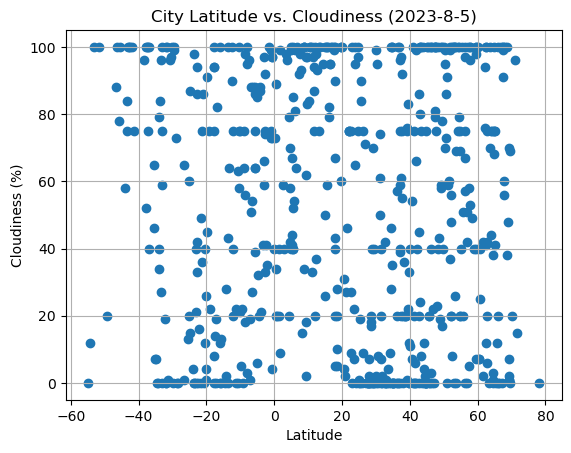

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(3)
plt.clf
latitude = city_data_df['Lat']
clouds = city_data_df['Cloudiness']
plt.scatter(x=latitude, y=clouds)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (2023-8-5)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

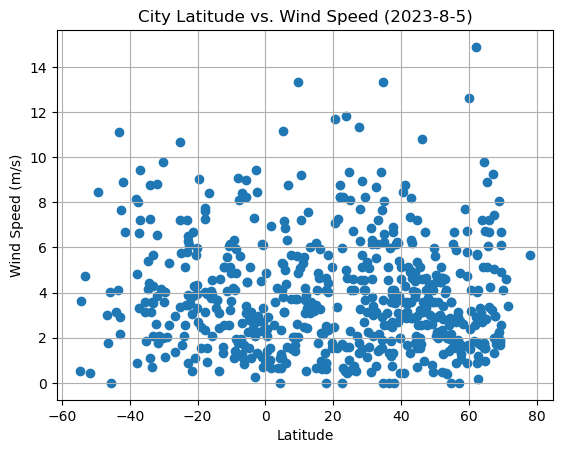

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(4)
plt.clf
latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']
plt.scatter(x=latitude, y=wind)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (2023-8-5)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def lin_reg(x_axis, y_axis):
    plt.scatter(x=x_axis, y=y_axis, color='blue')
    corr = round(st.pearsonr(x_axis, y_axis)[0],2)
    (slope, intercept, rvalue, pvalue, tderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    lin_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    plt.plot(x_axis,regress_values, color='red')
    plt.annotate(lin_eq,(0,5))
    plt.tight_layout()
    plt.show()
    print(f'The r-value is: {rvalue}')


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Arkhangel'Sk,64.5401,40.5433,22.88,59,1,1.71,RU,1691596955
6,Lerwick,60.1545,-1.1494,13.00,74,100,12.60,GB,1691596956
10,Kodiak,57.7900,-152.4072,11.73,94,100,1.54,US,1691596884
11,Holualoa,19.6228,-155.9522,23.91,78,100,5.14,US,1691596610
13,Colonia,50.9333,6.9500,24.42,50,0,3.60,DE,1691596478


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Afaahiti,-17.7500,-149.2833,21.93,75,94,7.61,PF,1691596855
1,Adamstown,-25.0660,-130.1015,20.12,67,60,10.66,PN,1691596955
2,Edinburgh Of The Seven Seas,-37.0676,-12.3116,11.06,67,40,9.44,SH,1691596501
4,Marica,-22.9194,-42.8186,23.97,72,86,6.30,BR,1691596956
5,Waitangi,-43.9535,-176.5597,8.79,83,58,3.13,NZ,1691596495


###  Temperature vs. Latitude Linear Regression Plot

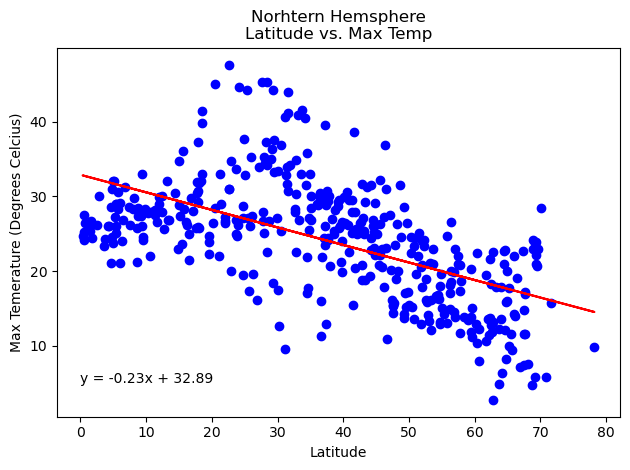

The r-value is: -0.579570550301911


In [17]:
# Linear regression on Northern Hemisphere

plt.xlabel('Latitude')
plt.ylabel('Max Temerature (Degrees Celcius)')
plt.title('Norhtern Hemsphere\nLatitude vs. Max Temp')
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


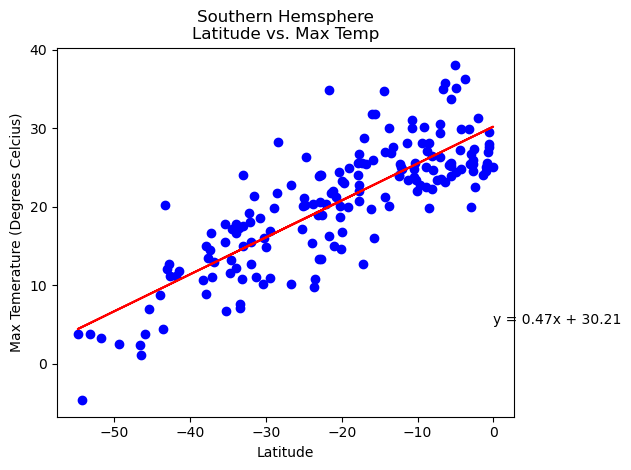

The r-value is: 0.8197958718778069


In [18]:
# Linear regression on Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Temerature (Degrees Celcius)')
plt.title('Southern Hemsphere\nLatitude vs. Max Temp')
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** 
- It appeats that there is moderate to strong correlation between latitude of a city and the temperature
- These charts suggest that the correlation is stronger in the southern hemisphere (0.82) than in the northern (-0.58)
- In the northern hemisphere, as you go up 1 latitude you can expect there to be a .23 drop in temperature(C)
- In the southern hemishpere, as you move on latitude close to the equater, you can expect a .47 increase in temperature(C)

### Humidity vs. Latitude Linear Regression Plot

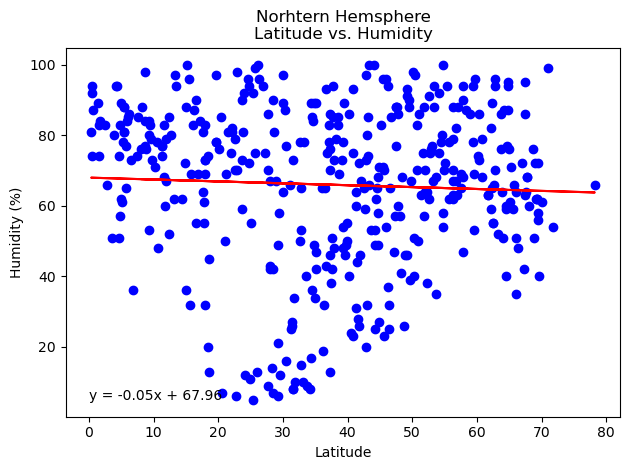

The r-value is: -0.04576173707703288


In [19]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Norhtern Hemsphere\nLatitude vs. Humidity')
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

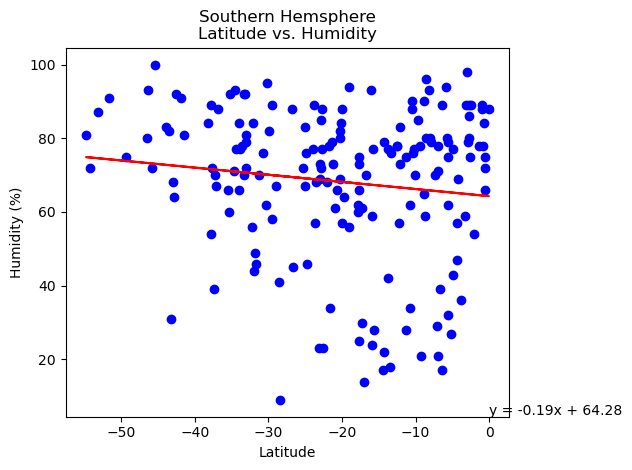

The r-value is: -0.12740388072265652


In [20]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemsphere\nLatitude vs. Humidity')
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** 
- There does not appear to be a correlation between a city's latitude and its humidity

### Cloudiness vs. Latitude Linear Regression Plot

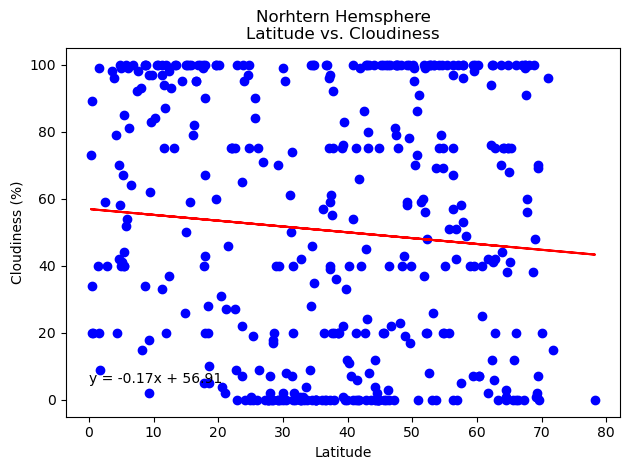

The r-value is: -0.08734210631062667


In [21]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Norhtern Hemsphere\nLatitude vs. Cloudiness')
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

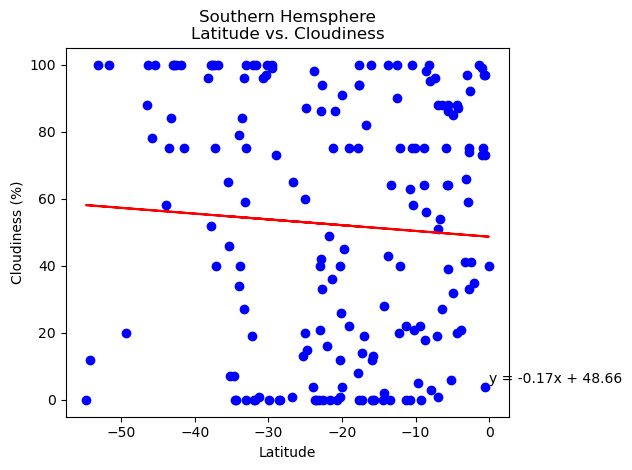

The r-value is: -0.062898441528076


In [22]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemsphere\nLatitude vs. Cloudiness')
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** 
- There does not appear to be a correlation between a city's latitude and its cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

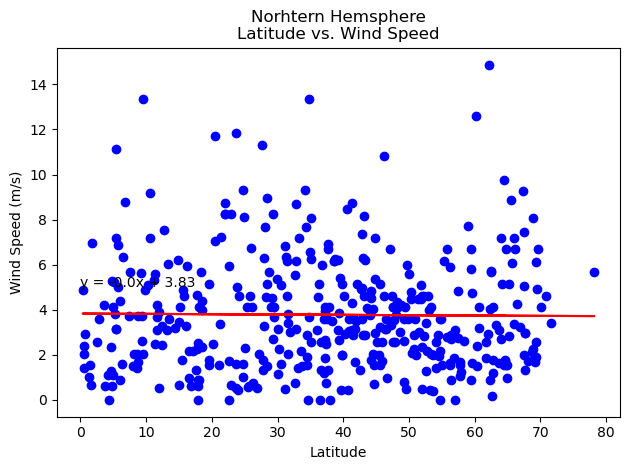

The r-value is: -0.011193079925801968


In [23]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Norhtern Hemsphere\nLatitude vs. Wind Speed')
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

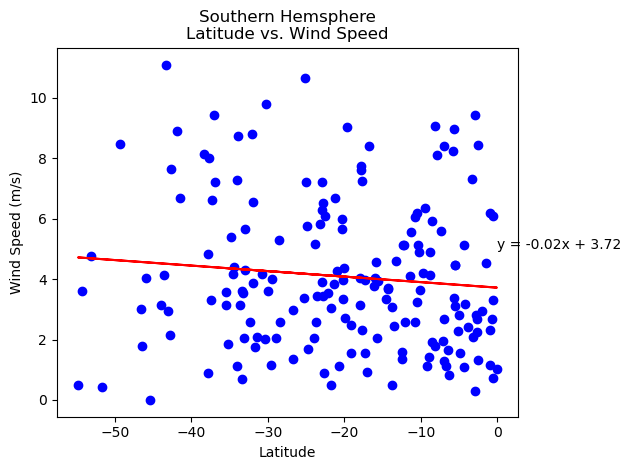

The r-value is: -0.10155185371431218


In [24]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemsphere\nLatitude vs. Wind Speed')
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** 
- There does not appear to be a correlation between a city's latitude and its Wind Speed